Реализовать поведение "игры", в рамках которого на карте присутствует 4 тигра, препятствия и кролик. Каждый из тигров обучается ловить кролика самостоятельно. Альфа и Гамма функции Беллмана каждого из тигров отличается. Провести 100 испытаний по поимке кролика. Составить график зависимости Альфа, Гамма от успешной поимке кролика. 

In [32]:
from enviroment import HunterWorldEnv
from agent import TableAgent
from target import Target
from loc import Location
from trainer import AgentTrainer
import numpy as np
import random
import pandas as pd


SEED = 42
SIZE = 11
random.seed = SEED
np.random.seed = SEED

In [2]:
tiger_location = [Location(SIZE-1, SIZE-1), Location(0, SIZE-1), Location(SIZE-1, 0), Location(0, 0)]

target = Target(SIZE, x=SIZE//2, y=SIZE//2, escape=0.5)
agents = [TableAgent(size=SIZE, alpha=i/10, gamma=j/10) for i in range(1, 11) for j in range(1, 11)]
env = HunterWorldEnv(agents[0], target, SIZE, agent_locs=tiger_location)
env.print()

,0,1,2,3,4,5,6,7,8,9,10
0,A,.,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,B,.,.,.,.,.
3,.,B,.,.,.,B,.,.,.,.,.
4,.,.,.,.,.,.,.,.,.,.,.
5,.,.,.,.,B,T,.,.,.,.,B
6,B,.,B,.,.,.,.,.,.,.,.
7,B,.,.,.,B,.,.,.,.,.,.
8,.,.,.,.,.,.,.,.,.,.,.
9,.,.,.,B,B,.,.,.,B,.,.


In [8]:
agents = [TableAgent(SIZE, alpha=i/10, gamma=j/10) for i in range(1, 11) for j in range(1, 11)]
#agents = [TableAgent(SIZE, alpha=i/10, gamma=i/10) for i in range(6, 10)]
trainer = AgentTrainer(agents, target, env)
trainer.start(locations=tiger_location)

Agent: 100/100	Location: 4/4	Episod: 100/100

,Alpha,Gamma,Done,Episod,Step
Agent-59,0.6,1.0,True,1.75,51.0
Agent-64,0.7,0.5,True,2.0,50.0
Agent-94,1.0,0.5,True,2.0,51.5
Agent-96,1.0,0.7,True,2.0,51.5
Agent-65,0.7,0.6,True,2.25,50.0
Agent-86,0.9,0.7,True,2.25,51.5
Agent-57,0.6,0.8,True,2.25,52.5
Agent-78,0.8,0.9,True,2.25,53.0
Agent-66,0.7,0.7,True,2.5,50.0
Agent-47,0.5,0.8,True,2.5,51.0


In [9]:
'''
agent_id = 3
for loc in tiger_location:
    trainer.agents[agent_id].location = loc
    trainer.agents[agent_id].backup = (loc.x, loc.y)
    trainer.check(agent_id, view=True)
'''

'\nagent_id = 3\nfor loc in tiger_location:\n    trainer.agents[agent_id].location = loc\n    trainer.agents[agent_id].backup = (loc.x, loc.y)\n    trainer.check(agent_id, view=True)\n'

In [10]:
trainer.statistic.to_csv('statistic.csv', index_label='Agent')

__________

In [33]:
statistic = pd.read_csv('statistic.csv')
statistic.head()

,Agent,Alpha,Gamma,Done,Episod,Step
0,Agent-0,0.1,0.1,False,100.0,100.0
1,Agent-1,0.1,0.2,True,20.5,50.0
2,Agent-2,0.1,0.3,True,12.5,50.0
3,Agent-3,0.1,0.4,True,10.0,50.0
4,Agent-4,0.1,0.5,True,8.0,50.5


In [34]:
statistic.sort_values(by=['Episod', 'Step'])

,Agent,Alpha,Gamma,Done,Episod,Step
59,Agent-59,0.6,1.0,True,1.75,51.0
64,Agent-64,0.7,0.5,True,2.00,50.0
94,Agent-94,1.0,0.5,True,2.00,51.5
96,Agent-96,1.0,0.7,True,2.00,51.5
65,Agent-65,0.7,0.6,True,2.25,50.0
...,...,...,...,...,...,...
60,Agent-60,0.7,0.1,False,100.00,100.0
70,Agent-70,0.8,0.1,False,100.00,100.0
80,Agent-80,0.9,0.1,False,100.00,100.0
90,Agent-90,1.0,0.1,False,100.00,100.0


In [36]:
statistic[statistic['Done'] == False]

,Agent,Alpha,Gamma,Done,Episod,Step
0,Agent-0,0.1,0.1,False,100.0,100.0
10,Agent-10,0.2,0.1,False,100.0,100.0
20,Agent-20,0.3,0.1,False,100.0,100.0
30,Agent-30,0.4,0.1,False,100.0,100.0
40,Agent-40,0.5,0.1,False,100.0,100.0
50,Agent-50,0.6,0.1,False,100.0,100.0
60,Agent-60,0.7,0.1,False,100.0,100.0
70,Agent-70,0.8,0.1,False,100.0,100.0
80,Agent-80,0.9,0.1,False,100.0,100.0
90,Agent-90,1.0,0.1,False,100.0,100.0


In [42]:
statistic[statistic['Done']]['Episod'].max()

20.5

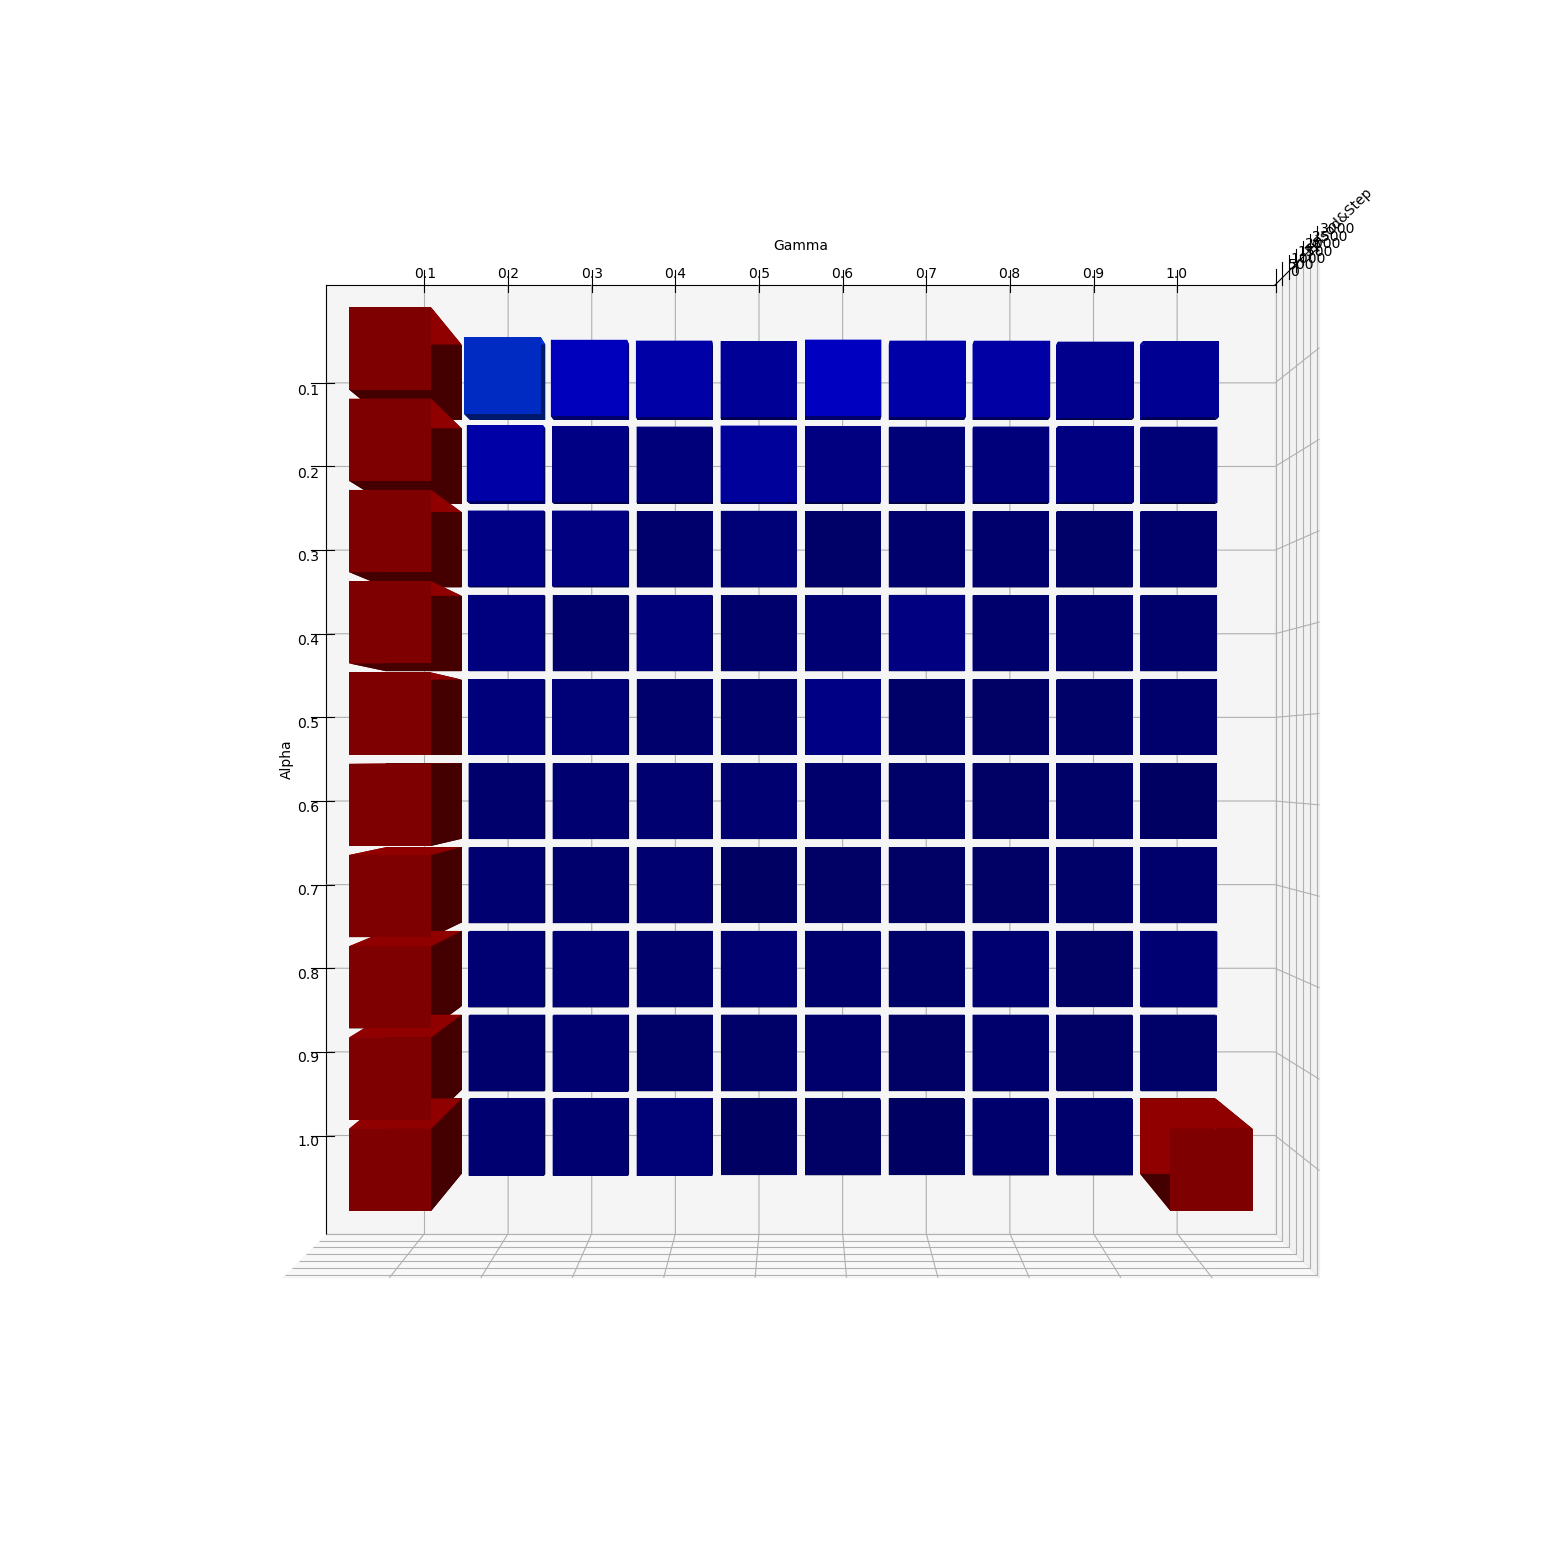

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)



fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

x = statistic.Alpha
y = statistic.Gamma
_, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = statistic.Episod * 30 + statistic.Step

cmap = cm.get_cmap('jet')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 
ax.bar3d(x-dx/2, y-dy/2, 0, dx, dy, dz, color=rgba, shade=True)
ax.view_init(90, 0)

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Gamma")
ax.set_zlabel('Episod&Step')
plt.show()

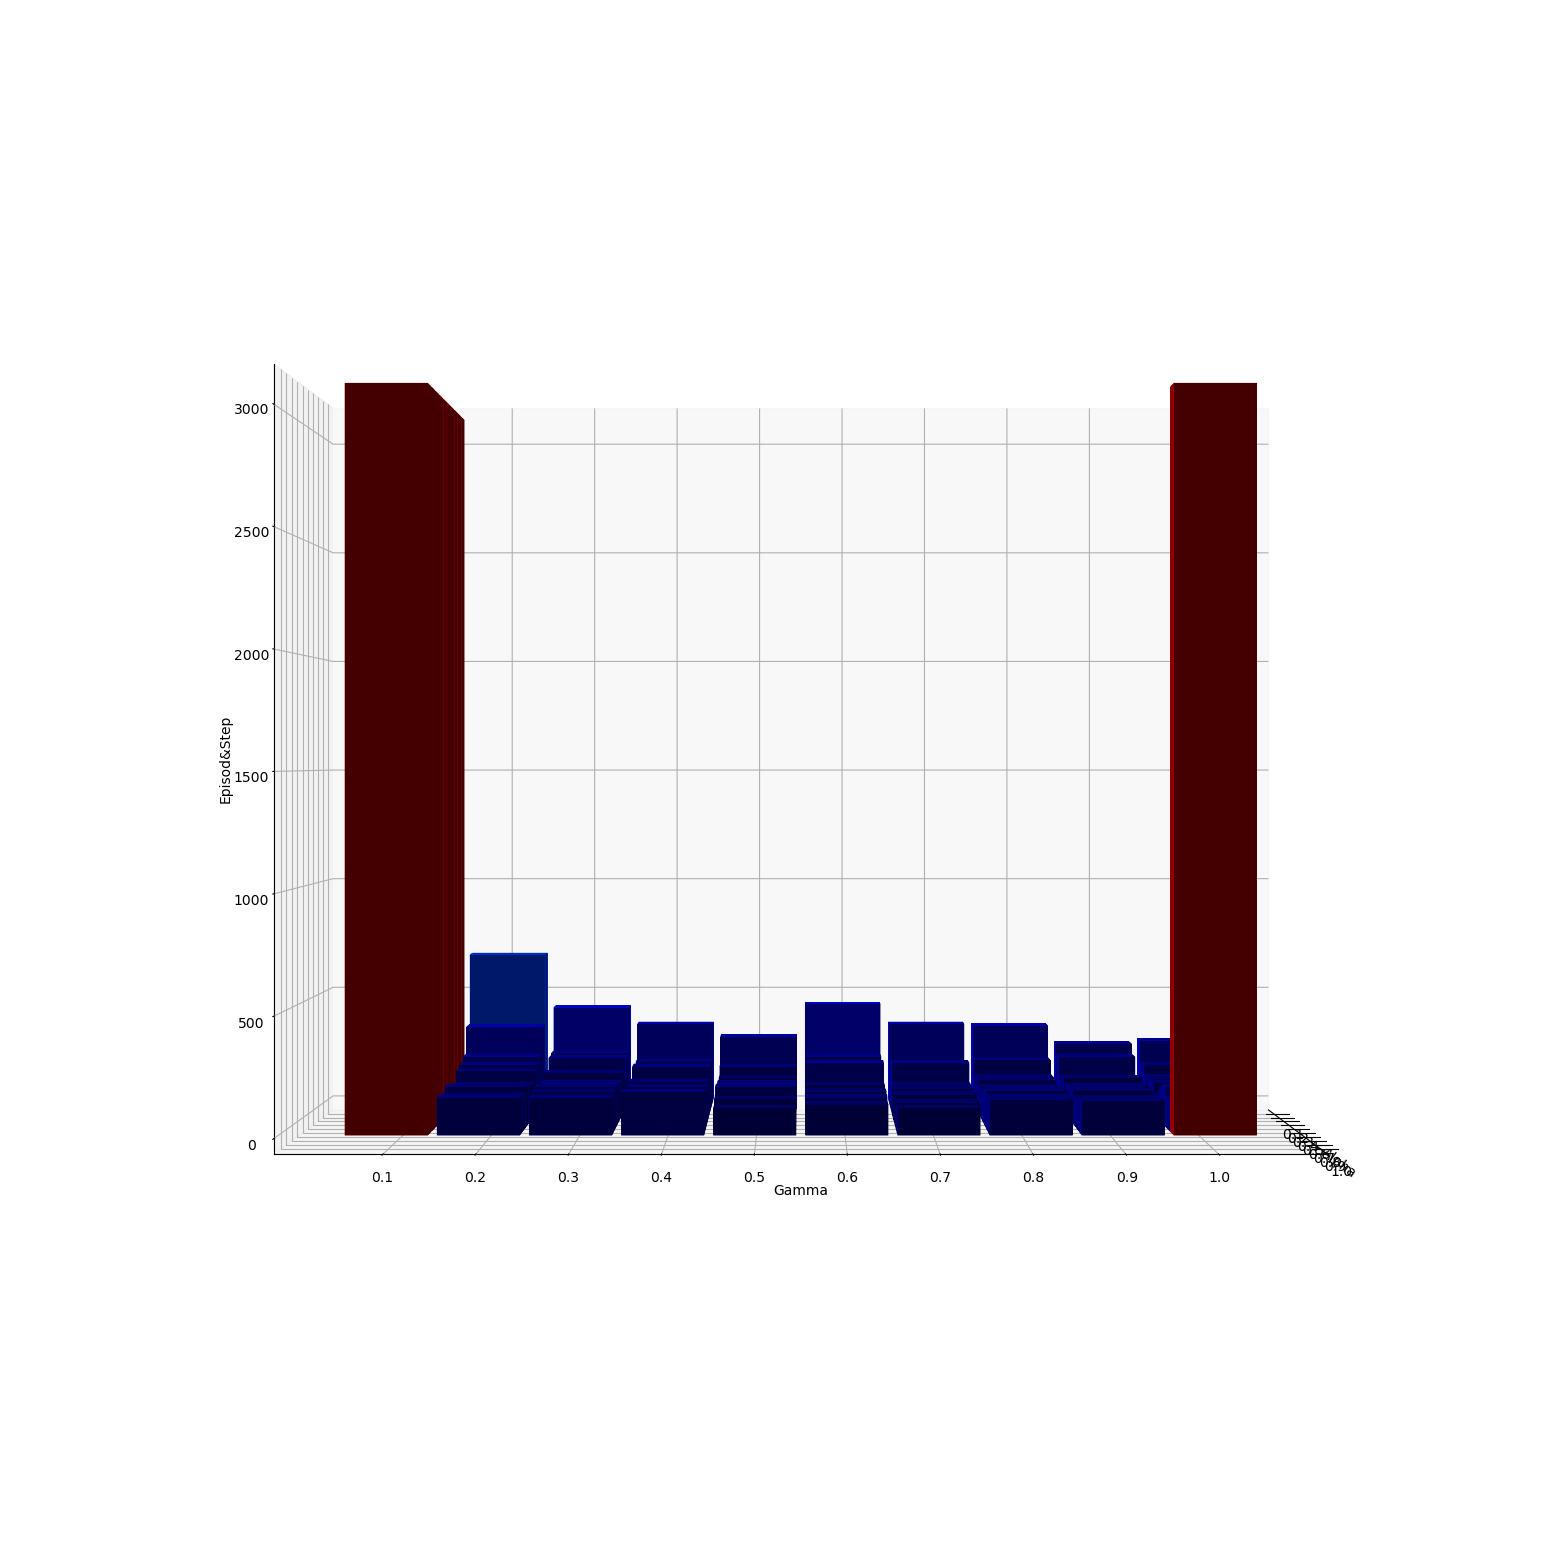

In [30]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)



fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')


x = statistic.Alpha
y = statistic.Gamma
_, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = statistic.Episod * 30 + statistic.Step

cmap = cm.get_cmap('jet')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 
ax.bar3d(x-dx/2, y-dy/2, 0, dx, dy, dz, color=rgba, shade=True)
ax.view_init(0, 0)

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Gamma")
ax.set_zlabel('Episod&Step')
plt.show()

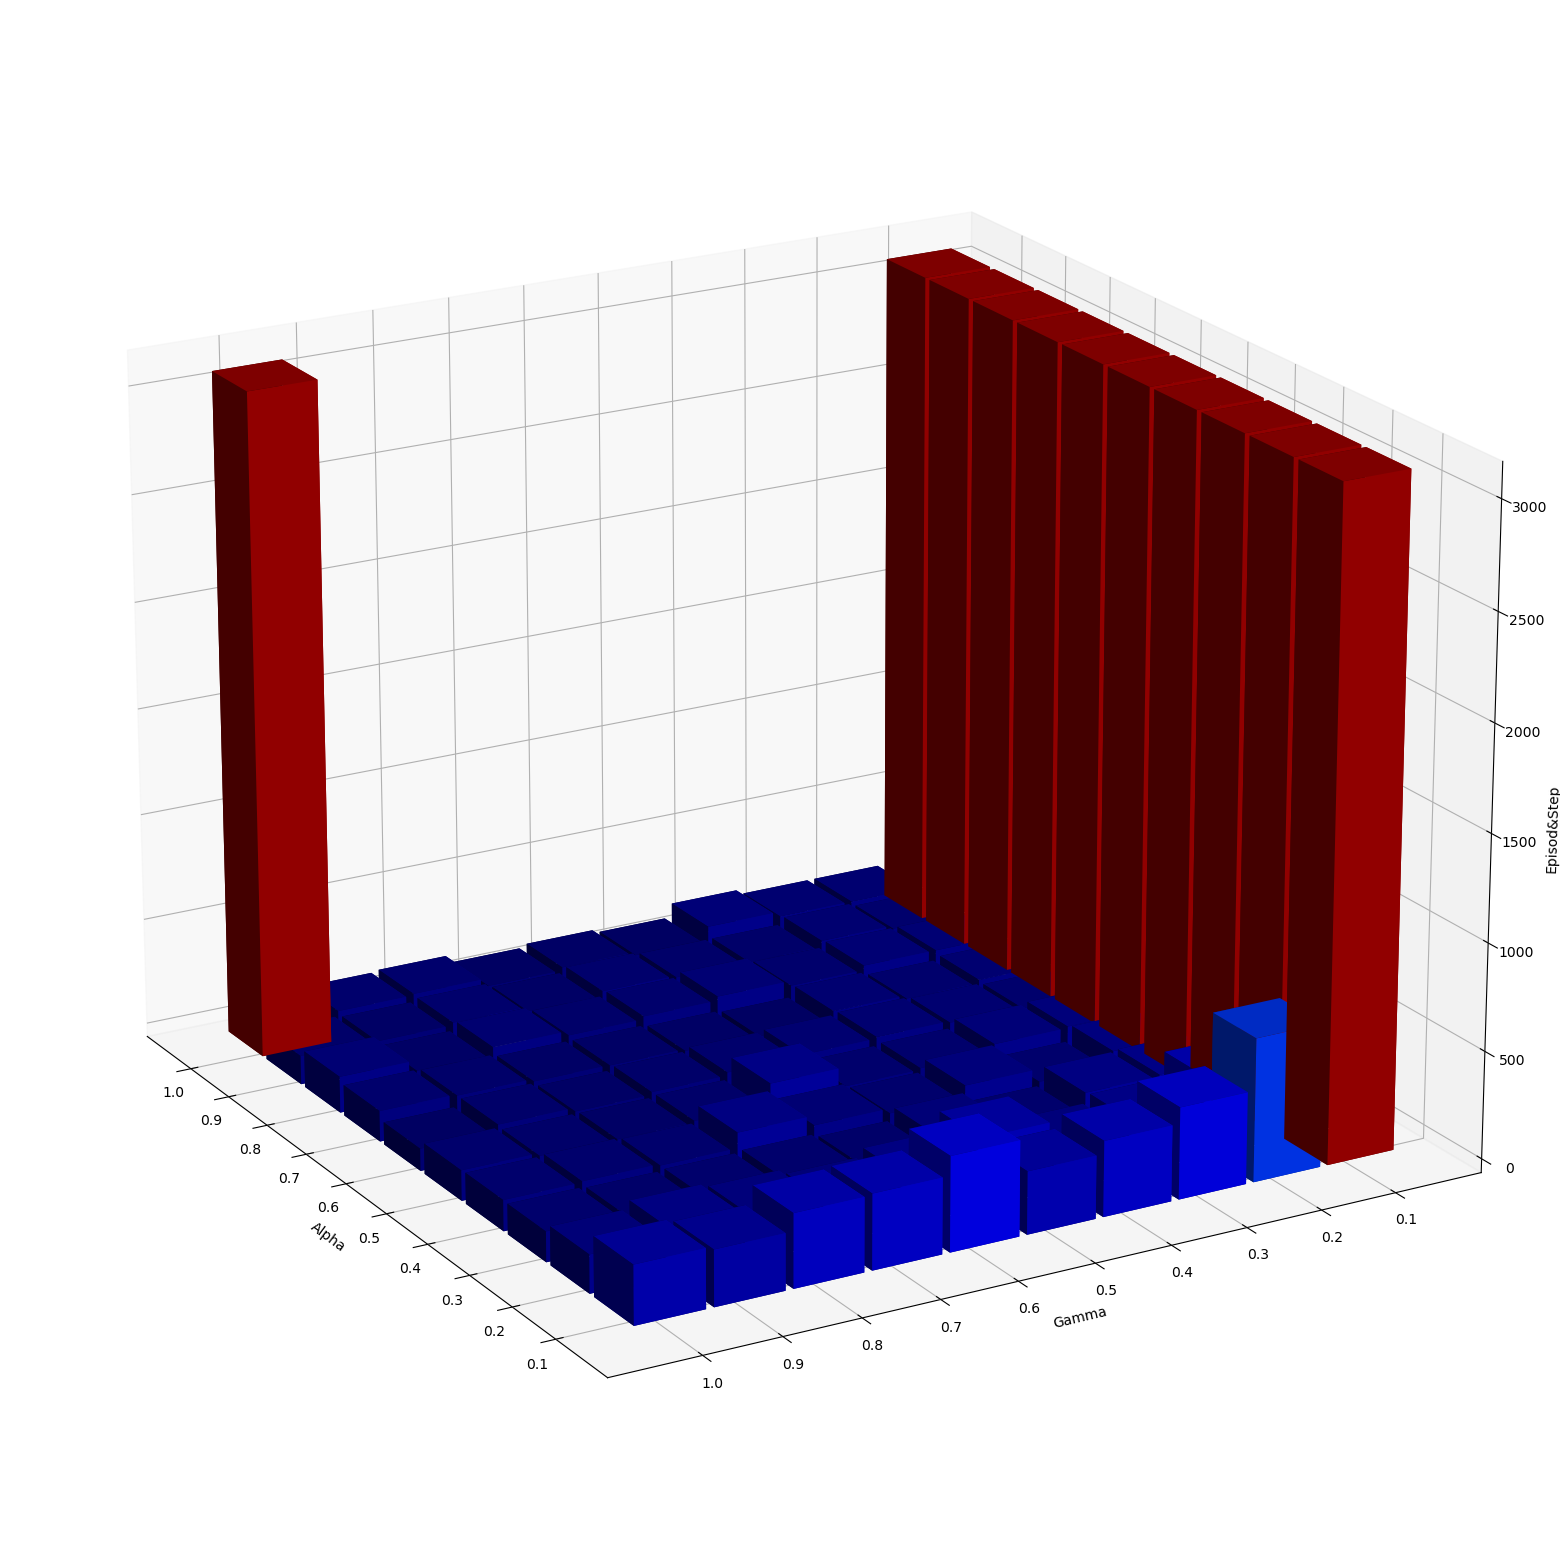

In [31]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)



fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

x = statistic.Alpha
y = statistic.Gamma
_, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = statistic.Episod * 30 + statistic.Step

cmap = cm.get_cmap('jet')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 
ax.bar3d(x-dx/2, y-dy/2, 0, dx, dy, dz, color=rgba, shade=True)
ax.view_init(20, -210)

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Gamma")
ax.set_zlabel('Episod&Step')
plt.show()